# IS4303 IT-MEDIATED FINANCIAL SOLUTIONS AND PLATFORMS

> ## Homework 1 - Data Preprocessing and Linear Model

> ## Due Date: Feb. 13 (Wed.), 2019, 23:00 SG Time
> ## Name your `.ipynb` file as "`StudentID_YourName_HW1.ipynb`" and then upload 

<div class="alert alert-warning">
<b>Python Version:</b> 2.7+<br>Create a virtual environment in Anaconda if needed.
</div>

## Sections
<ul>
    <li><a href="#0" style="text-decoration: none">0. Goal</a></li>
    <li><a href="#1" style="text-decoration: none">1. Dataset</a></li>
    <li><a href="#2" style="text-decoration: none">2. Data Preprocessing</a></li>
    <li><a href="#3" style="text-decoration: none">3. Simple Modelling</a></li>
    <li><a href="#4" style="text-decoration: none">4. References</a></li>
</ul>

## Summary of Data Preprocessing

<div class="alert alert-success">
<b>Resources:</b> <a href="https://youtu.be/2e4fgSgn64Q" target="_blank" style="text-decoration: none"><span class="label label-info">Data Preprocessing</span></a>
</div>

In [1]:
# You can also watch this youtube video in this notebook
from IPython.display import HTML, IFrame
IFrame(src="https://www.youtube.com/embed/2e4fgSgn64Q", width="659", height="494")

***

<a id="0"></a>

## 0 Goal

* The goal of this assignment is to understand how to do ETL (Extract, Transform, Load) and run simple linear model
* In this assignment, we will clean data and build linear models using a loan dataset. 
* A dataset containing complete loan data for all loans issued has been uploaded on IVLE. It includes the current loan status (Current, Late, Fully Paid, etc.) and a large set of attributes for each customer. 
* The assignment will require you to use the dataset to build models to predict loan default.
* Please answer the questions and write the code / results in the empty cells. 

<a id="1"></a>

## 1 Dataset

<br><div class="btn-group"> 
    <a href="https://en.wikipedia.org/wiki/Lending_Club" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Introduction</a>
    <a href="#overview" class="btn btn-success" role="button" style="text-decoration: none">Overview</a>
    <a href="https://www.lendingclub.com/info/download-data.action" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Attributes</a> 
    <a href="#task" class="btn btn-warning" role="button" style="text-decoration: none">Tasks</a>
</div>

#### Introduction

[LendingClub](https://en.wikipedia.org/wiki/Lending_Club) is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.

Lending Club enables borrowers to create unsecured personal loans between $\text{\$1,000}$ and $\text{\$40,000}$. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

Lending Club also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

In this Homework, we will use data from the Lending Club to predict whether the loan will default (along with prediction probabilities).

<a id="overview"></a>
#### Overview
The file <b>`LoanStats_2018Q3.csv`</b> contains complete loan data for all loans issued through the 2018 Quarter-3, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others.  <br/>

#### Attributes
The dataset can be downloaded [here](https://www.lendingclub.com/info/download-data.action) and it has also been uploaded in the `Homework` folder on IVLE. Information on the columns and features can be found in data dictionary. A data dictionary is provided in a separate file <b>`LCDataDictionary.xlsx`</b>.

<a id="task"></a>
#### Tasks: Data Cleaning, Pre-processing and Linear Model
* The original dataset that you have downloaded has multiple attributes of each loan, along with an indicator of the `loan status`. 
* The status of the loan is 1 if the loan was “charged off” (CO), delinquent, or late in payment, and 0 otherwise. This is the outcome we are trying to predict in the analysis.    

## Questions:
* [Question 1](#Q1)
* [Question 2](#Q2)
* [Question 3](#Q3)
* [Question 4](#Q4)
* [Question 5](#Q5)
* [Question 6](#Q6)
* [Question 7](#Q7)
* [Question 8](#Q8)
* [Question 9](#Q9)
* [Question 10](#Q10)
* [Question 11](#Q11)
* [Question 12](#Q12)
* [Question 13](#Q13)
* [Question 14](#Q14)
* [Question 15](#Q15)

<a id="2"></a> 

## 2 Data Preprocessing

In [2]:
#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from collections import defaultdict
from IPython.display import HTML
%matplotlib inline

<a id="Q1"></a>

<div class="alert alert-info">
<b>Question 1 (1 point): Loading Data</b> 
<p>Load the dataset <code><b>LoanStats_2018Q3.csv</b></code> into a data frame named loans.</p>
<p>How many rows and columns do you have?</p>
</div>

In [13]:
# Read data into python pandas and name it as "loans"
%pwd
loans = pd.read_csv("./LoanStats_2018Q3.csv", low_memory=False, header=1)
loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.97%,507.55,D,D1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000.0,25000.0,25000.0,60 months,13.56%,576.02,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000.0,30000.0,30000.0,36 months,18.94%,1098.78,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6000.0,6000.0,6000.0,36 months,7.84%,187.58,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10650.0,10650.0,10650.0,36 months,7.84%,332.95,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,9000.0,9000.0,9000.0,36 months,6.11%,274.25,A,A1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,20000.0,20000.0,20000.0,36 months,6.67%,614.53,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,20000.0,20000.0,20000.0,36 months,7.84%,625.26,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,16000.0,16000.0,16000.0,36 months,7.21%,495.58,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,15000.0,15000.0,15000.0,60 months,15.02%,357.01,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(loans.shape)

(128196, 145)


<a id="Q2"></a>

<div class="alert alert-info">
<b>Question 2 (1 point): Unique Values</b> 
<p>The column that we are interested in is called <code><b><i>loan_status</i></b></code>: Current status of the loan.</p> 
<p>Please report how many unique loan status and what are they exactly?</p>
</div>

In [5]:
loans["loan_status"].value_counts()

Current               121082
Fully Paid              4786
In Grace Period          948
Late (31-120 days)       920
Late (16-30 days)        348
Charged Off              110
Name: loan_status, dtype: int64

In [6]:
loans["loan_status"].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', nan], dtype=object)

<a id="Q3"></a>

<div class="alert alert-info">
<b>Question 3 (1 point): Deleting Rows</b> 
<p>Please delete rows when <code><b><i>loan_status</i></b></code> is <code>Current</code>, since it is not able to determine whether these applicants will default or not at this stage. Their records are not suitable for training set, which requires both the input feature variables and output target variable.</p> 
<p>Now how many rows/observations do we have?</p>
</div>

In [8]:
loans = loans[loans['loan_status'] != 'Current']
print(loans.shape)

(7114, 146)


<a id="Q4"></a>

<div class="alert alert-info">
<b>Question 4 (1 point): Create New Variables</b> 
<p>Let's create a new variable <code><b><i>bad_loans</i></b></code>: 1 means a risky (bad) loan, and 0 means a safe loan.</p>
<p>Suppose: a loan is risky when loan status is <code>Charged Off</code>, <code>Late (16-30 days)</code>, or <code>Late (31-120 days)</code>, and the loan is safe when otherwise.</p>
<p>Create this new variable <code><b><i>bad_loans</i></b></code>.</p>
</div>

In [9]:
bad_status = ['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off']
loans['bad_loans'] = loans['loan_status'].map(lambda x: 1 if x in bad_status else 0)

<a id="Q5"></a>

<div class="alert alert-info">
<b>Question 5 (1 point): Explore Categorical Variables</b> 
<p>Plot the frequency/distribution of <code>safe</code> and <code>risky</code> loans. <b>Create a <code>histogram</code>.</b></p>
<p>How many <code>safe</code> loans and <code>risky</code> loans do we have, respectively?</p>
</div>

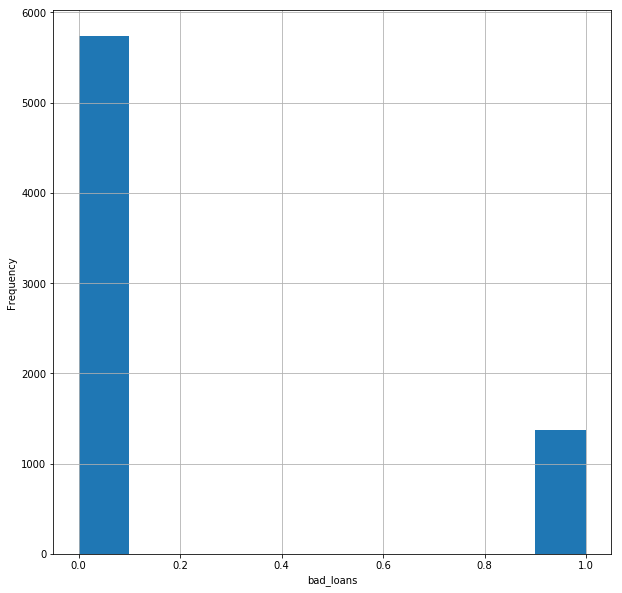

In [10]:
# Distribution of safe and risky loans
plt.figure(figsize=(10,10))
loans['bad_loans'].hist()
plt.xlabel('bad_loans')
plt.ylabel('Frequency')
plt.show()

<a id="Q6"></a>

In [12]:
print(loans['bad_loans'].sum(),loans.shape[0]-loans['bad_loans'].sum())

1378 5736


<div class="alert alert-info">
<b>Question 6 (1 point): Column Selection</b> 
<p>For this assignment, we will use a <b>subset</b> of numerical features. For this assignment, we select features based on our knowledge.</p>
<p>Please create a new dataset named <code><b>loans_new</b></code> from the <code><b>loans</b></code> dataset. This new dataset should include an output label <code><b><i>bad_loans</i></b></code> and the following <b>9</b> features:</p>
<p>Please output the first 5 rows with the header of the <code><b>loans_new</b></code> data frame.</p>
</div>

<table class="table" align="left">
  <caption><div class="text" style=" text-align:center;"><h2>Table: Include 9 Features In The New Dataset</h2></div></caption>
  <thead>
    <tr>
      <th><p>Feature</p></th>
      <th><p>Definition</p></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><p>annual_inc</p></td>
      <td><p>The self-reported annual income provided by the borrower during registration.</p></td>
    </tr>
    <tr>
      <td><p>chargeoff_within_12_mths</p></td>
      <td><p>Number of charge-offs within 12 months.</p></td>
    </tr>
    <tr>
      <td><p>delinq_amnt</p></td>
      <td><p>The past-due amount owed for the accounts on which the borrower is now delinquent.</p></td>
    </tr>
    <tr>
      <td><p>delinq_2yrs</p></td>
      <td><p>The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.</p></td>
    </tr> 
    <tr>
      <td><p>dti</p></td>
      <td><p>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</p></td>
    </tr>
    <tr>
      <td><p>installment</p></td>
      <td><p>The monthly payment owed by the borrower if the loan originates.</p></td>
    </tr>
    <tr>
      <td><p>int_rate</p></td>
      <td><p>Interest Rate on the loan.</p></td>
    </tr>
    <tr>
      <td><p>loan_amnt</p></td>
      <td><p>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</p></td>
    </tr>
    <tr>
      <td><p>mths_since_last_delinq</p></td>
      <td><p>The number of months since the borrower's last delinquency.</p></td>
    </tr>
  </tbody>
</table>

<div class="alert alert-danger">
<b>Note:</b><p>Definitions of all columns are provided in a seperate file <b>LCDataDictionary.xlsx</b>.</p>
</div>

In [13]:
from copy import deepcopy
loans_new = deepcopy(loans) # Please note the difference between shallow copy and deep copy in Python

feature_list = ['annual_inc','chargeoff_within_12_mths','delinq_amnt','delinq_2yrs','dti',\
                'installment','int_rate','loan_amnt','mths_since_last_delinq']
output = 'bad_loans'
loans_new = loans_new[feature_list+[output]]
loans_new.columns.tolist()

['annual_inc',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'delinq_2yrs',
 'dti',
 'installment',
 'int_rate',
 'loan_amnt',
 'mths_since_last_delinq',
 'bad_loans']

In [14]:
loans_new.head()

,annual_inc,chargeoff_within_12_mths,delinq_amnt,delinq_2yrs,dti,installment,int_rate,loan_amnt,mths_since_last_delinq,bad_loans
12,38500.0,0.0,0.0,1.0,30.34,142.66,13.56%,4200.0,16.0,0
20,90000.0,0.0,0.0,0.0,14.13,309.74,7.21%,10000.0,42.0,0
47,59000.0,0.0,0.0,0.0,12.45,169.00,6.67%,5500.0,52.0,0
99,65000.0,0.0,0.0,0.0,16.89,271.39,12.73%,12000.0,52.0,1
112,60000.0,0.0,0.0,0.0,26.58,880.66,16.14%,25000.0,80.0,0


<a id="Q7"></a>

<div class="alert alert-info">
<b>Question 7 (1 point): Column Transformation</b> 
<p>Check the type of feature <code><b><i>int_rate</i></b></code>, its type is <code>object</code>. It means that this feature is not numerical yet.</p>
<p>Please transform this feature <code><b><i>int_rate</i></b></code> into numerical (i.e., Extracting the number before percentage sign "%").</p>
<p><b>Example: </b>13.56% -> 13.56</p>
</div>

In [17]:
# Type of features
loans_new.dtypes

annual_inc                  float64
chargeoff_within_12_mths    float64
delinq_amnt                 float64
delinq_2yrs                 float64
dti                         float64
installment                 float64
int_rate                     object
loan_amnt                   float64
mths_since_last_delinq      float64
bad_loans                     int64
dtype: object

In [18]:
# Transform object type to numerical type
loans_new['int_rate'] = loans_new['int_rate'].str.rstrip('%').astype('float')

In [19]:
# Check type of features again
loans_new.dtypes

annual_inc                  float64
chargeoff_within_12_mths    float64
delinq_amnt                 float64
delinq_2yrs                 float64
dti                         float64
installment                 float64
int_rate                    float64
loan_amnt                   float64
mths_since_last_delinq      float64
bad_loans                     int64
dtype: object

<a id="Q8"></a>

<div class="alert alert-info">
<b>Question 8 (1 point): Drop Missing Values</b> 
<p>Output the number of missing values of each column.</p> 
<p>Delete <b>ALL</b> the missing values.</p> 
<p>Then report summary statistics (e.g., mean, median, standard deviation,etc.) of <b>ALL</b> columns.</p>
<p>Output the number of rows and column of the updated data frame. Make a plot similar to Question 5.</p> 
</div>

In [20]:
loans_new.isna().sum()

annual_inc                     2
chargeoff_within_12_mths       2
delinq_amnt                    2
delinq_2yrs                    2
dti                           16
installment                    2
int_rate                       2
loan_amnt                      2
mths_since_last_delinq      3807
bad_loans                      0
dtype: int64

In [21]:
# Remove missing values and summary statistics
loans_new.dropna(inplace=True)
loans_new.describe()

,annual_inc,chargeoff_within_12_mths,delinq_amnt,delinq_2yrs,dti,installment,int_rate,loan_amnt,mths_since_last_delinq,bad_loans
count,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000
mean,82024.430763,0.013935,3.215389,0.566495,19.113756,451.026934,15.645750,14625.568010,36.194487,0.196910
std,56303.905648,0.127159,179.946068,1.083856,25.111953,291.015863,5.552503,9760.102976,21.634100,0.397724
min,1200.000000,0.000000,0.000000,0.000000,0.000000,31.090000,5.310000,1000.000000,1.000000,0.000000
25%,50000.000000,0.000000,0.000000,0.000000,10.900000,228.540000,11.550000,7000.000000,18.000000,0.000000
50%,70000.000000,0.000000,0.000000,0.000000,16.620000,369.470000,15.020000,12000.000000,34.000000,0.000000
75%,100000.000000,0.000000,0.000000,1.000000,23.620000,619.320000,18.940000,20000.000000,52.000000,0.000000
max,980000.000000,2.000000,10335.000000,12.000000,999.000000,1424.320000,30.990000,40000.000000,171.000000,1.000000


In [22]:
loans_new.shape

(3301, 10)

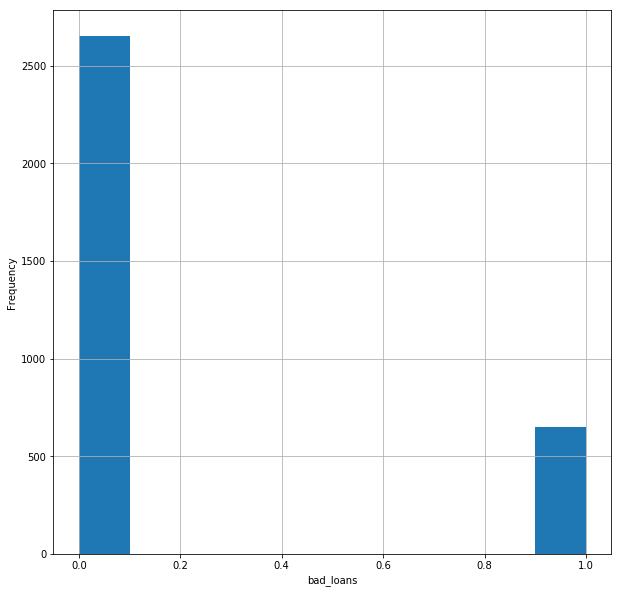

In [23]:
plt.figure(figsize=(10,10))
loans_new['bad_loans'].hist()
plt.xlabel('bad_loans')
plt.ylabel('Frequency')
plt.show()

<a id="Q9"></a>

<div class="alert alert-info">
<b>Question 9 (1 point): Correlation Table</b> 
<p>Report or plot correlations of <b>ALL</b> variables/columns.</p>
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Pandas</a>
    <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Seaborn Heatmap</a>
    <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Numpy</a>
</div>
</div>

In [19]:
# Report correlations
correlation = loans_new.corr()
correlation

,annual_inc,chargeoff_within_12_mths,delinq_amnt,delinq_2yrs,dti,installment,int_rate,loan_amnt,mths_since_last_delinq,bad_loans
annual_inc,1.000000,0.002976,0.026874,0.081591,-0.148208,0.302122,-0.064946,0.292202,-0.093717,-0.031447
chargeoff_within_12_mths,0.002976,1.000000,0.134911,0.109806,-0.006448,-0.025322,0.010556,-0.027976,-0.096159,0.029612
delinq_amnt,0.026874,0.134911,1.000000,0.024074,-0.008479,0.019059,-0.002768,0.013658,-0.020098,0.036092
delinq_2yrs,0.081591,0.109806,0.024074,1.000000,0.018710,0.038072,0.097915,0.020435,-0.552522,0.039210
dti,-0.148208,-0.006448,-0.008479,0.018710,1.000000,0.036021,0.110400,0.027619,0.000840,0.051461
installment,0.302122,-0.025322,0.019059,0.038072,0.036021,1.000000,0.100939,0.955329,-0.033196,0.065571
int_rate,-0.064946,0.010556,-0.002768,0.097915,0.110400,0.100939,1.000000,0.057016,-0.086889,0.160891
loan_amnt,0.292202,-0.027976,0.013658,0.020435,0.027619,0.955329,0.057016,1.000000,-0.017585,0.046454
mths_since_last_delinq,-0.093717,-0.096159,-0.020098,-0.552522,0.000840,-0.033196,-0.086889,-0.017585,1.000000,-0.071507
bad_loans,-0.031447,0.029612,0.036092,0.039210,0.051461,0.065571,0.160891,0.046454,-0.071507,1.000000


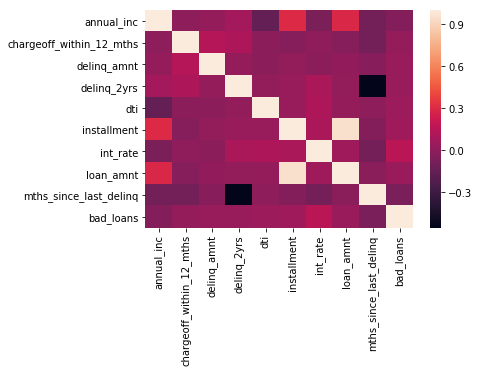

In [20]:
# Plot correlations
import seaborn as sns
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation)

<a id="Q10"></a>

<div class="alert alert-info">
<b>Question 10 (1 point): Boxplot Diagram </b> 
<p>Show boxplot diagram of <b>3</b> variables/columns <code><b><i>dti</i></b></code>, <code><b><i>int_rate</i></b></code> and <code><b><i>mths_since_last_delinq</i></b></code>. Boxplot can help us identify potential outliers.</p>
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="http://www.physics.csbsju.edu/stats/box2.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Boxplot</a>
    <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Matplotlib</a>
    <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Seaborn</a>
</div>
</div>

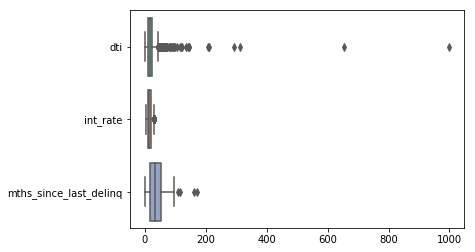

In [21]:
# Plot Boxplot
import seaborn as sns
feature_list = ['dti','int_rate','mths_since_last_delinq']
ax = sns.boxplot(data=loans_new[feature_list], orient="h", palette="Set2")

In [22]:
# Save a copy to csv file
loans_new.to_csv('./dataset.csv', index=None)

<a id="3"></a>

## 3 Simple Modelling

In [25]:
# Import libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Read data
data = pd.read_csv("./dataset.csv")
data.head(n=10)

,annual_inc,chargeoff_within_12_mths,delinq_amnt,delinq_2yrs,dti,installment,int_rate,loan_amnt,mths_since_last_delinq,bad_loans
0,38500.0,0.0,0.0,1.0,30.34,142.66,13.56,4200.0,16.0,0
1,90000.0,0.0,0.0,0.0,14.13,309.74,7.21,10000.0,42.0,0
2,59000.0,0.0,0.0,0.0,12.45,169.00,6.67,5500.0,52.0,0
3,65000.0,0.0,0.0,0.0,16.89,271.39,12.73,12000.0,52.0,1
4,60000.0,0.0,0.0,0.0,26.58,880.66,16.14,25000.0,80.0,0
5,68000.0,0.0,0.0,0.0,32.24,467.57,12.73,20675.0,27.0,0
6,50000.0,0.0,0.0,0.0,24.34,516.88,10.08,16000.0,44.0,1
7,50000.0,0.0,0.0,0.0,21.75,149.56,16.91,4200.0,25.0,0
8,49500.0,0.0,0.0,0.0,16.90,237.60,11.55,7200.0,56.0,0
9,58000.0,0.0,0.0,0.0,10.35,245.82,6.67,8000.0,45.0,0


<a id="Q11"></a>

<div class="alert alert-success">
<b>Question 11 (1 point): Train-Test Split </b> 
<p>Please split the data into <code><b>train</b></code> and <code><b>test</b></code> datasets using a 40/60 split.</p>
<p>Set <code><b>random_state=12345</b></code> so that results could be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Train Test Split</a>
</div>
<p>Output the fraction of <code>bad_loans</code> in the <code>train</code> and <code>test</code> data set. </p> 
</div>

In [26]:
# Split the dataset
output = 'bad_loans'
X = data.drop(output, axis=1) # Here no need to set inplace=True
y = data[output]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=12345)
print(y_train.sum()/y_train.count(),y_test.sum()/y_test.count())

0.20075757575757575 0.19434628975265017


<a id="Q12"></a>

<div class="alert alert-success">
<b>Question 12 (1 point): Data Normalization/Standardization/Rescaling </b> 
<p>Check the mean values of these 9 features in Question 8. It is obvious that their scales vary significantly. You need to rescale them in both <code><b>train</b></code> and <code><b>test</b></code> datasets.</p>
<p>Please use <code><b>z-index</b></code> method: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a></p>
<p>Details of data normalization/standardization/rescaling are provided here: </p>
<div class="btn-group">    
    <a class="btn btn-primary dropdown-toggle" role="button" data-toggle="dropdown">Data Normalization<span class="caret"></span></a> 
    <ul class="dropdown-menu" role="menu">
        <li><a href="https://en.wikipedia.org/wiki/Feature_scaling" target="_blank" style="text-decoration: none">Wikipedia</a></li>
        <li><a href="https://www.youtube.com/watch?v=r5E2X1JdHAU" target="_blank" style="text-decoration: none">Youtube</a></li>
        <li><a href="https://scikit-learn.org/stable/modules/preprocessing.html" target="_blank" style="text-decoration: none">Scikit-learn</a></li>
    </ul>
</div>
</div>

<div class="alert alert-danger">
<b>Note:</b><p>Please rescale features only.</p>
<p>Do not rescale output column.</p>
</div>

In [27]:
# Standardize features: z-index standardization on Train and Test datasets
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

<a id="Q13"></a>

<div class="alert alert-success">
<b>Question 13 (1 point): Logistic Regression </b> 
<p>Please fit <b>rescaled</b> <code><b>train</b></code> data with <b>Logistic Regression</b> model.</p>
<p>Please report/print parameter values on the rescaled <code><b>train</b></code> dataset.</p>
<p>Please print the performance of model on rescaled train data using performance metric: <code><b>accuracy_score</b></code>.</p>
<p><b>Remember: </b>Set <code><b>fit_intercept=True</b></code> and <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Logistic Regression</a>
</div>
</div>

In [28]:
# Fit logistic regression model
lr = LogisticRegression(fit_intercept=True, random_state=12345)
lr_model = lr.fit(X=X_train_std, y=y_train)
print("Intercept: ", lr_model.intercept_)
print("Coefficients: ", lr_model.coef_)

Intercept:  [-1.45548289]
Coefficients:  [[-0.06489031  0.00216702  0.18506601 -0.00789047  0.49350919  0.35143888
   0.32747354 -0.18713796 -0.30416693]]


In [27]:
# Get predicted labels for train data
pred = lr_model.predict(X_train_std)

# Performance of model on train data
print("Train Accuracy: ", accuracy_score(y_train, pred))
print("Train Error: ", 1 - accuracy_score(y_train, pred))

Train Accuracy:  0.8022727272727272
Train Error:  0.19772727272727275


<a id="Q14"></a>

<div class="alert alert-success">
<b>Question 14 (1 point): Model Performance </b> 
<p>Please show model performance (e.g., classification accuracy, error or AUC of ROC) of this <b>Logistic Regression</b> model on the <code><b>rescaled test dataset</b></code>.</p>
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Confusion Matrix</a>
    <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">Classification Metrics</a>
</div>
</div>

In [28]:
# Get predicted labels for test data
y_pred_lr = lr_model.predict(X_test_std)

# Performance of model on test data
print("Test Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Test Error: ", 1 - accuracy_score(y_test, y_pred_lr))

Test Accuracy:  0.8021201413427562
Test Error:  0.19787985865724378


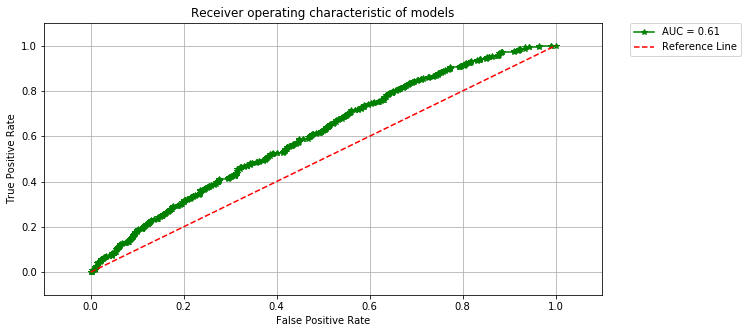

In [29]:
# Get ROC curve and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
scores = lr_model.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

# Plot static ROC curve
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(fpr, tpr, 'g*-', label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--', label='Reference Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic of models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
# Let's make an interactive ROC curve: Using plotly
# Reference: https://plot.ly/python/
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
py.offline.init_notebook_mode(connected=True)

In [31]:
# Make more interactive
layout = go.Layout(
    title = 'Receiver operating characteristic of models',
    xaxis = {
        'title': 'False Positive Rate',
        'range': [0, 1]
    },
    yaxis = {
        'title': 'True Positive Rate',
        'range': [0, 1]
    }
)

trace_roc = go.Scatter(
    x = fpr,
    y = tpr,
    mode = 'lines',
    name = 'AUC = %0.2f' % roc_auc,
    line = {
        'shape': 'spline'
    }
)

trace_reference = go.Scatter(
    x = [0, 1],
    y = [0, 1],
    mode = 'lines',
    name = 'Reference Line',
    line = {
        'shape': 'spline',
        'dash': 'dashdot',
        'color': 'red',
        'width': 2
    }    
)

fig = go.Figure(data=[trace_roc, trace_reference], layout=layout)
py.offline.iplot(fig)

<a id="Q15"></a>

<div class="alert alert-success">
<b>Question 15 (1 point): Open Question </b> 
<p>In this example, do you think whether <code>classification accuracy/error</code> is a good performance metric or not? Provide reasons.</p>
<p>If your answer is no, which alternative performance metrics do you prefer? Provide reasons.</p>
</div>

In [32]:
# Write your answer in this cell



<a id="4"></a>